In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from data_wrangler import get_model_data_for_regression
from models import get_preprocessor, save_model, MODELS

FIGURE_PATH = pathlib.Path('../report/figures/out/')

data = get_model_data_for_regression() # 100000, True)
display(data)


,contest_id,roster_slot_id,player_id,entry_count,usage_ratio,season,double_up,draft_group_id,fifty_fifty,guaranteed,...,projection_value_ratio_mean,projection_value_ratio_max,projection_value_ratio_std,salary_vor,projection_vor,projection_value_ratio_vor,salary_vum,projection_vum,projection_value_ratio_vum,log_usage
0,163439930,DST,323,934,0.042827,2024,f,109136,f,t,...,107.834930,126.666667,11.036855,0.560930,1.392891,1.212047,-1.302805,0.000000,-0.494212,-1.368287
1,163439930,DST,324,934,0.084582,2024,f,109136,f,t,...,107.834930,126.666667,11.036855,-0.090473,1.011930,1.706259,-1.954208,-0.380962,0.000000,-1.072720
2,163439930,DST,325,934,0.062099,2024,f,109136,f,t,...,107.834930,126.666667,11.036855,-0.741875,-0.035715,1.135780,-2.605610,-1.428607,-0.570479,-1.206919
3,163439930,DST,326,934,0.044968,2024,f,109136,f,t,...,107.834930,126.666667,11.036855,0.778064,1.297651,0.755790,-1.085671,-0.095240,-0.950470,-1.347098
4,163439930,DST,327,934,0.033191,2024,f,109136,f,t,...,107.834930,126.666667,11.036855,1.646601,1.202411,-0.471452,-0.217134,-0.190481,-2.177712,-1.478985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964812,172306485,WR,1213799,99,0.121212,2024,f,119182,f,t,...,96.042418,152.261905,23.837410,-0.588089,-0.425235,0.010053,-2.778721,-3.109730,-2.348403,-0.916454
2964813,172306485,WR,1213865,99,0.050505,2024,f,119182,f,t,...,96.042418,152.261905,23.837410,0.152903,-0.031141,0.001511,-2.037729,-2.715636,-2.356945,-1.296665
2964814,172306485,WR,1218643,99,0.373737,2024,f,119182,f,t,...,96.042418,152.261905,23.837410,1.079143,0.855141,0.722191,-1.111488,-1.829354,-1.636265,-0.427433
2964815,172306485,WR,1286176,99,0.040404,2024,f,119182,f,t,...,96.042418,152.261905,23.837410,-0.896836,-0.888167,-1.055487,-3.087468,-3.572662,-3.413943,-1.393575


## Simple Models

RMSE LinearRegression = 0.5004275925425147
RMSE Lasso = 0.5447229844118147
RMSE Ridge = 0.5004275786457525
RMSE SKLGradientBoosting = 0.3461448819004838
RMSE XGBoost = 0.3164257071558424
[LightGBM] [Info] Total Bins 5376
[LightGBM] [Info] Number of data points in the train set: 2371853, number of used features: 129
[LightGBM] [Info] Start training from score -1.864949


/home/matthew/miniconda3/envs/dfs/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


RMSE LightGBM = 0.34540146872176924


/home/matthew/miniconda3/envs/dfs/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


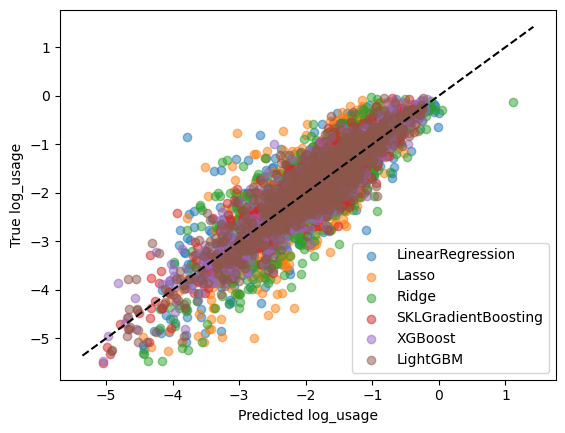

In [ ]:

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from models import MODELS
del MODELS['RandomForest']  # Too slow

test_frac = 0.2
X_train, X_test, y_train, y_test = train_test_split(data, data['log_usage'], test_size=test_frac, random_state=42)

def train_and_evaluate_models(model_list: dict, target: str = 'log_usage'):
    
    rmse = {}
    for label, model in model_list.items():
        model.fit(X_train, y_train)
        rmse[label] = root_mean_squared_error(model.predict(X_test), y_test)

        print(f'RMSE {label} = {np.mean(rmse[label])}')


    plt.figure()
    for label, model in model_list.items():
        if len(X_test) > 1000:
            idx = np.random.choice(len(X_test), size=1000, replace=False)
            plt.scatter(model.predict(X_test.iloc[idx]), y_test.iloc[idx], alpha=0.5, label=label)
        else:
            plt.scatter(model.predict(X_test), y_test, alpha=0.5, label=label)
    
    xmin, xmax = plt.xlim()
    plt.plot([xmin, xmax], [xmin, xmax], color='black', linestyle='--')
    plt.ylabel(f'True {target}')
    plt.xlabel(f'Predicted {target}')
    plt.legend()
    plt.savefig(FIGURE_PATH / f'model_predictions_vs_true_{target}.png', bbox_inches='tight', dpi=300)
    plt.show()

train_and_evaluate_models(MODELS, target='log_usage')

In [ ]:
# save models
SAVE_PATH = pathlib.Path('./models/')
SAVE_MODELS = False
if SAVE_MODELS:
    for label, model in MODELS.items():
        save_model(model, SAVE_PATH / f'{label}.pkl')